In [1]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.linear_model import LogisticRegression
import time 
import datetime 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model 

In [2]:
data_sm = pd.read_csv('NEW-DATA-1.T15.txt',sep=' ')
data_sm

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.800,758.8800,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.800,762.0690,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.600,766.2510,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.300,766.0370,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.900,762.7430,0,0,0,19.7400,45.4743,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.8520,0,0,0,16.4013,50.0373,3.0
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0


In [3]:
data_sm.isnull().sum()

1:Date                             0
2:Time                             0
3:Temperature_Comedor_Sensor       0
4:Temperature_Habitacion_Sensor    0
5:Weather_Temperature              0
6:CO2_Comedor_Sensor               0
7:CO2_Habitacion_Sensor            0
8:Humedad_Comedor_Sensor           0
9:Humedad_Habitacion_Sensor        0
10:Lighting_Comedor_Sensor         0
11:Lighting_Habitacion_Sensor      0
12:Precipitacion                   0
13:Meteo_Exterior_Crepusculo       0
14:Meteo_Exterior_Viento           0
15:Meteo_Exterior_Sol_Oest         0
16:Meteo_Exterior_Sol_Est          0
17:Meteo_Exterior_Sol_Sud          0
18:Meteo_Exterior_Piranometro      0
19:Exterior_Entalpic_1             0
20:Exterior_Entalpic_2             0
21:Exterior_Entalpic_turbo         0
22:Temperature_Exterior_Sensor     0
23:Humedad_Exterior_Sensor         0
24:Day_Of_Week                     0
dtype: int64

In [4]:
data_sm.tail()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.8520,0,0,0,16.4013,50.0373,3.0
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0
2763,11/04/2012,06:30,20.7627,20.4400,12.1333,191.563,193.664,41.2800,41.8373,20.5620,...,8952.83,51347.50,10270.700,112.2670,0,0,0,16.2860,50.2987,3.0


In [5]:
data_sm.isnull()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data_sm.notnull()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2760,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2761,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2762,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [7]:
data_sm.sum().isnull()

1:Date                             False
2:Time                             False
3:Temperature_Comedor_Sensor       False
4:Temperature_Habitacion_Sensor    False
5:Weather_Temperature              False
6:CO2_Comedor_Sensor               False
7:CO2_Habitacion_Sensor            False
8:Humedad_Comedor_Sensor           False
9:Humedad_Habitacion_Sensor        False
10:Lighting_Comedor_Sensor         False
11:Lighting_Habitacion_Sensor      False
12:Precipitacion                   False
13:Meteo_Exterior_Crepusculo       False
14:Meteo_Exterior_Viento           False
15:Meteo_Exterior_Sol_Oest         False
16:Meteo_Exterior_Sol_Est          False
17:Meteo_Exterior_Sol_Sud          False
18:Meteo_Exterior_Piranometro      False
19:Exterior_Entalpic_1             False
20:Exterior_Entalpic_2             False
21:Exterior_Entalpic_turbo         False
22:Temperature_Exterior_Sensor     False
23:Humedad_Exterior_Sensor         False
24:Day_Of_Week                     False
dtype: bool

In [8]:
data_sm.replace({'weight': {'?': ""}}, regex=False)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.800,758.8800,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.800,762.0690,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.600,766.2510,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.300,766.0370,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.900,762.7430,0,0,0,19.7400,45.4743,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.8520,0,0,0,16.4013,50.0373,3.0
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0


In [9]:
data_sm.isnull().sum()

1:Date                             0
2:Time                             0
3:Temperature_Comedor_Sensor       0
4:Temperature_Habitacion_Sensor    0
5:Weather_Temperature              0
6:CO2_Comedor_Sensor               0
7:CO2_Habitacion_Sensor            0
8:Humedad_Comedor_Sensor           0
9:Humedad_Habitacion_Sensor        0
10:Lighting_Comedor_Sensor         0
11:Lighting_Habitacion_Sensor      0
12:Precipitacion                   0
13:Meteo_Exterior_Crepusculo       0
14:Meteo_Exterior_Viento           0
15:Meteo_Exterior_Sol_Oest         0
16:Meteo_Exterior_Sol_Est          0
17:Meteo_Exterior_Sol_Sud          0
18:Meteo_Exterior_Piranometro      0
19:Exterior_Entalpic_1             0
20:Exterior_Entalpic_2             0
21:Exterior_Entalpic_turbo         0
22:Temperature_Exterior_Sensor     0
23:Humedad_Exterior_Sensor         0
24:Day_Of_Week                     0
dtype: int64

In [10]:
data_sm.index

RangeIndex(start=0, stop=2764, step=1)

In [11]:
data_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 24 columns):
1:Date                             2764 non-null object
2:Time                             2764 non-null object
3:Temperature_Comedor_Sensor       2764 non-null float64
4:Temperature_Habitacion_Sensor    2764 non-null float64
5:Weather_Temperature              2764 non-null float64
6:CO2_Comedor_Sensor               2764 non-null float64
7:CO2_Habitacion_Sensor            2764 non-null float64
8:Humedad_Comedor_Sensor           2764 non-null float64
9:Humedad_Habitacion_Sensor        2764 non-null float64
10:Lighting_Comedor_Sensor         2764 non-null float64
11:Lighting_Habitacion_Sensor      2764 non-null float64
12:Precipitacion                   2764 non-null float64
13:Meteo_Exterior_Crepusculo       2764 non-null float64
14:Meteo_Exterior_Viento           2764 non-null float64
15:Meteo_Exterior_Sol_Oest         2764 non-null float64
16:Meteo_Exterior_Sol_Est          2764 

In [12]:
data_sm.loc[2]

1:Date                             13/03/2012
2:Time                                  12:15
3:Temperature_Comedor_Sensor          18.7673
4:Temperature_Habitacion_Sensor       18.4367
5:Weather_Temperature                      17
6:CO2_Comedor_Sensor                  219.403
7:CO2_Habitacion_Sensor               218.933
8:Humedad_Comedor_Sensor               39.772
9:Humedad_Habitacion_Sensor           42.2267
10:Lighting_Comedor_Sensor             81.424
11:Lighting_Habitacion_Sensor           113.6
12:Precipitacion                            0
13:Meteo_Exterior_Crepusculo          622.656
14:Meteo_Exterior_Viento              1.89133
15:Meteo_Exterior_Sol_Oest            13960.5
16:Meteo_Exterior_Sol_Est             9669.63
17:Meteo_Exterior_Sol_Sud             95398.6
18:Meteo_Exterior_Piranometro         766.251
19:Exterior_Entalpic_1                      0
20:Exterior_Entalpic_2                      0
21:Exterior_Entalpic_turbo                  0
22:Temperature_Exterior_Sensor    

In [13]:
data_sm.isna().sum()

1:Date                             0
2:Time                             0
3:Temperature_Comedor_Sensor       0
4:Temperature_Habitacion_Sensor    0
5:Weather_Temperature              0
6:CO2_Comedor_Sensor               0
7:CO2_Habitacion_Sensor            0
8:Humedad_Comedor_Sensor           0
9:Humedad_Habitacion_Sensor        0
10:Lighting_Comedor_Sensor         0
11:Lighting_Habitacion_Sensor      0
12:Precipitacion                   0
13:Meteo_Exterior_Crepusculo       0
14:Meteo_Exterior_Viento           0
15:Meteo_Exterior_Sol_Oest         0
16:Meteo_Exterior_Sol_Est          0
17:Meteo_Exterior_Sol_Sud          0
18:Meteo_Exterior_Piranometro      0
19:Exterior_Entalpic_1             0
20:Exterior_Entalpic_2             0
21:Exterior_Entalpic_turbo         0
22:Temperature_Exterior_Sensor     0
23:Humedad_Exterior_Sensor         0
24:Day_Of_Week                     0
dtype: int64

In [14]:
data_sm = data_sm.drop(data_sm.columns[[0,1,11, 18, 19, 20]], axis=1)
data_sm

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,13:Meteo_Exterior_Crepusculo,14:Meteo_Exterior_Viento,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,113.5200,623.360,1.426250,9690.24,12604.20,95436.800,758.8800,18.1150,48.3750,2.0
1,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,113.6050,623.211,1.592000,11022.00,10787.20,95436.800,762.0690,18.4147,47.8080,2.0
2,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,113.6000,622.656,1.891330,13960.50,9669.63,95398.600,766.2510,18.8533,47.4320,2.0
3,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,113.3440,622.571,1.828000,18511.20,9648.13,95360.300,766.0370,19.2907,47.0240,2.0
4,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,113.0340,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,19.7400,45.4743,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,12.9400,392.603,0.074667,0.00,0.00,0.000,-3.4340,16.6180,49.2960,3.0
2760,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,19.3200,613.120,0.000000,465.92,2716.67,523.264,3.8520,16.4013,50.0373,3.0
2761,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,23.2427,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,16.2607,50.0587,3.0
2762,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,23.4400,615.403,0.299333,6795.26,38303.10,7110.660,66.9493,16.2367,49.8400,3.0


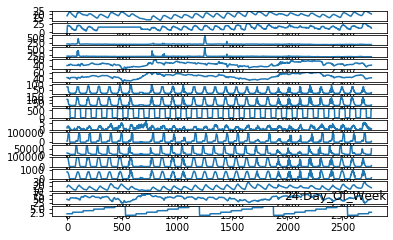

In [15]:
from matplotlib import pyplot
n_features = data_sm.values.shape[1]
pyplot.figure()
for i in range(1, n_features):
    # specify the subpout
    pyplot.subplot(n_features, 1, i)
    # plot data from each set
    pyplot.plot(data_sm.index, data_sm.values[:, i])

# add a readable name to the plot
pyplot.title(data_sm.columns[i], y=1, loc='right')
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296F527DFC8>,
      dtype=object)

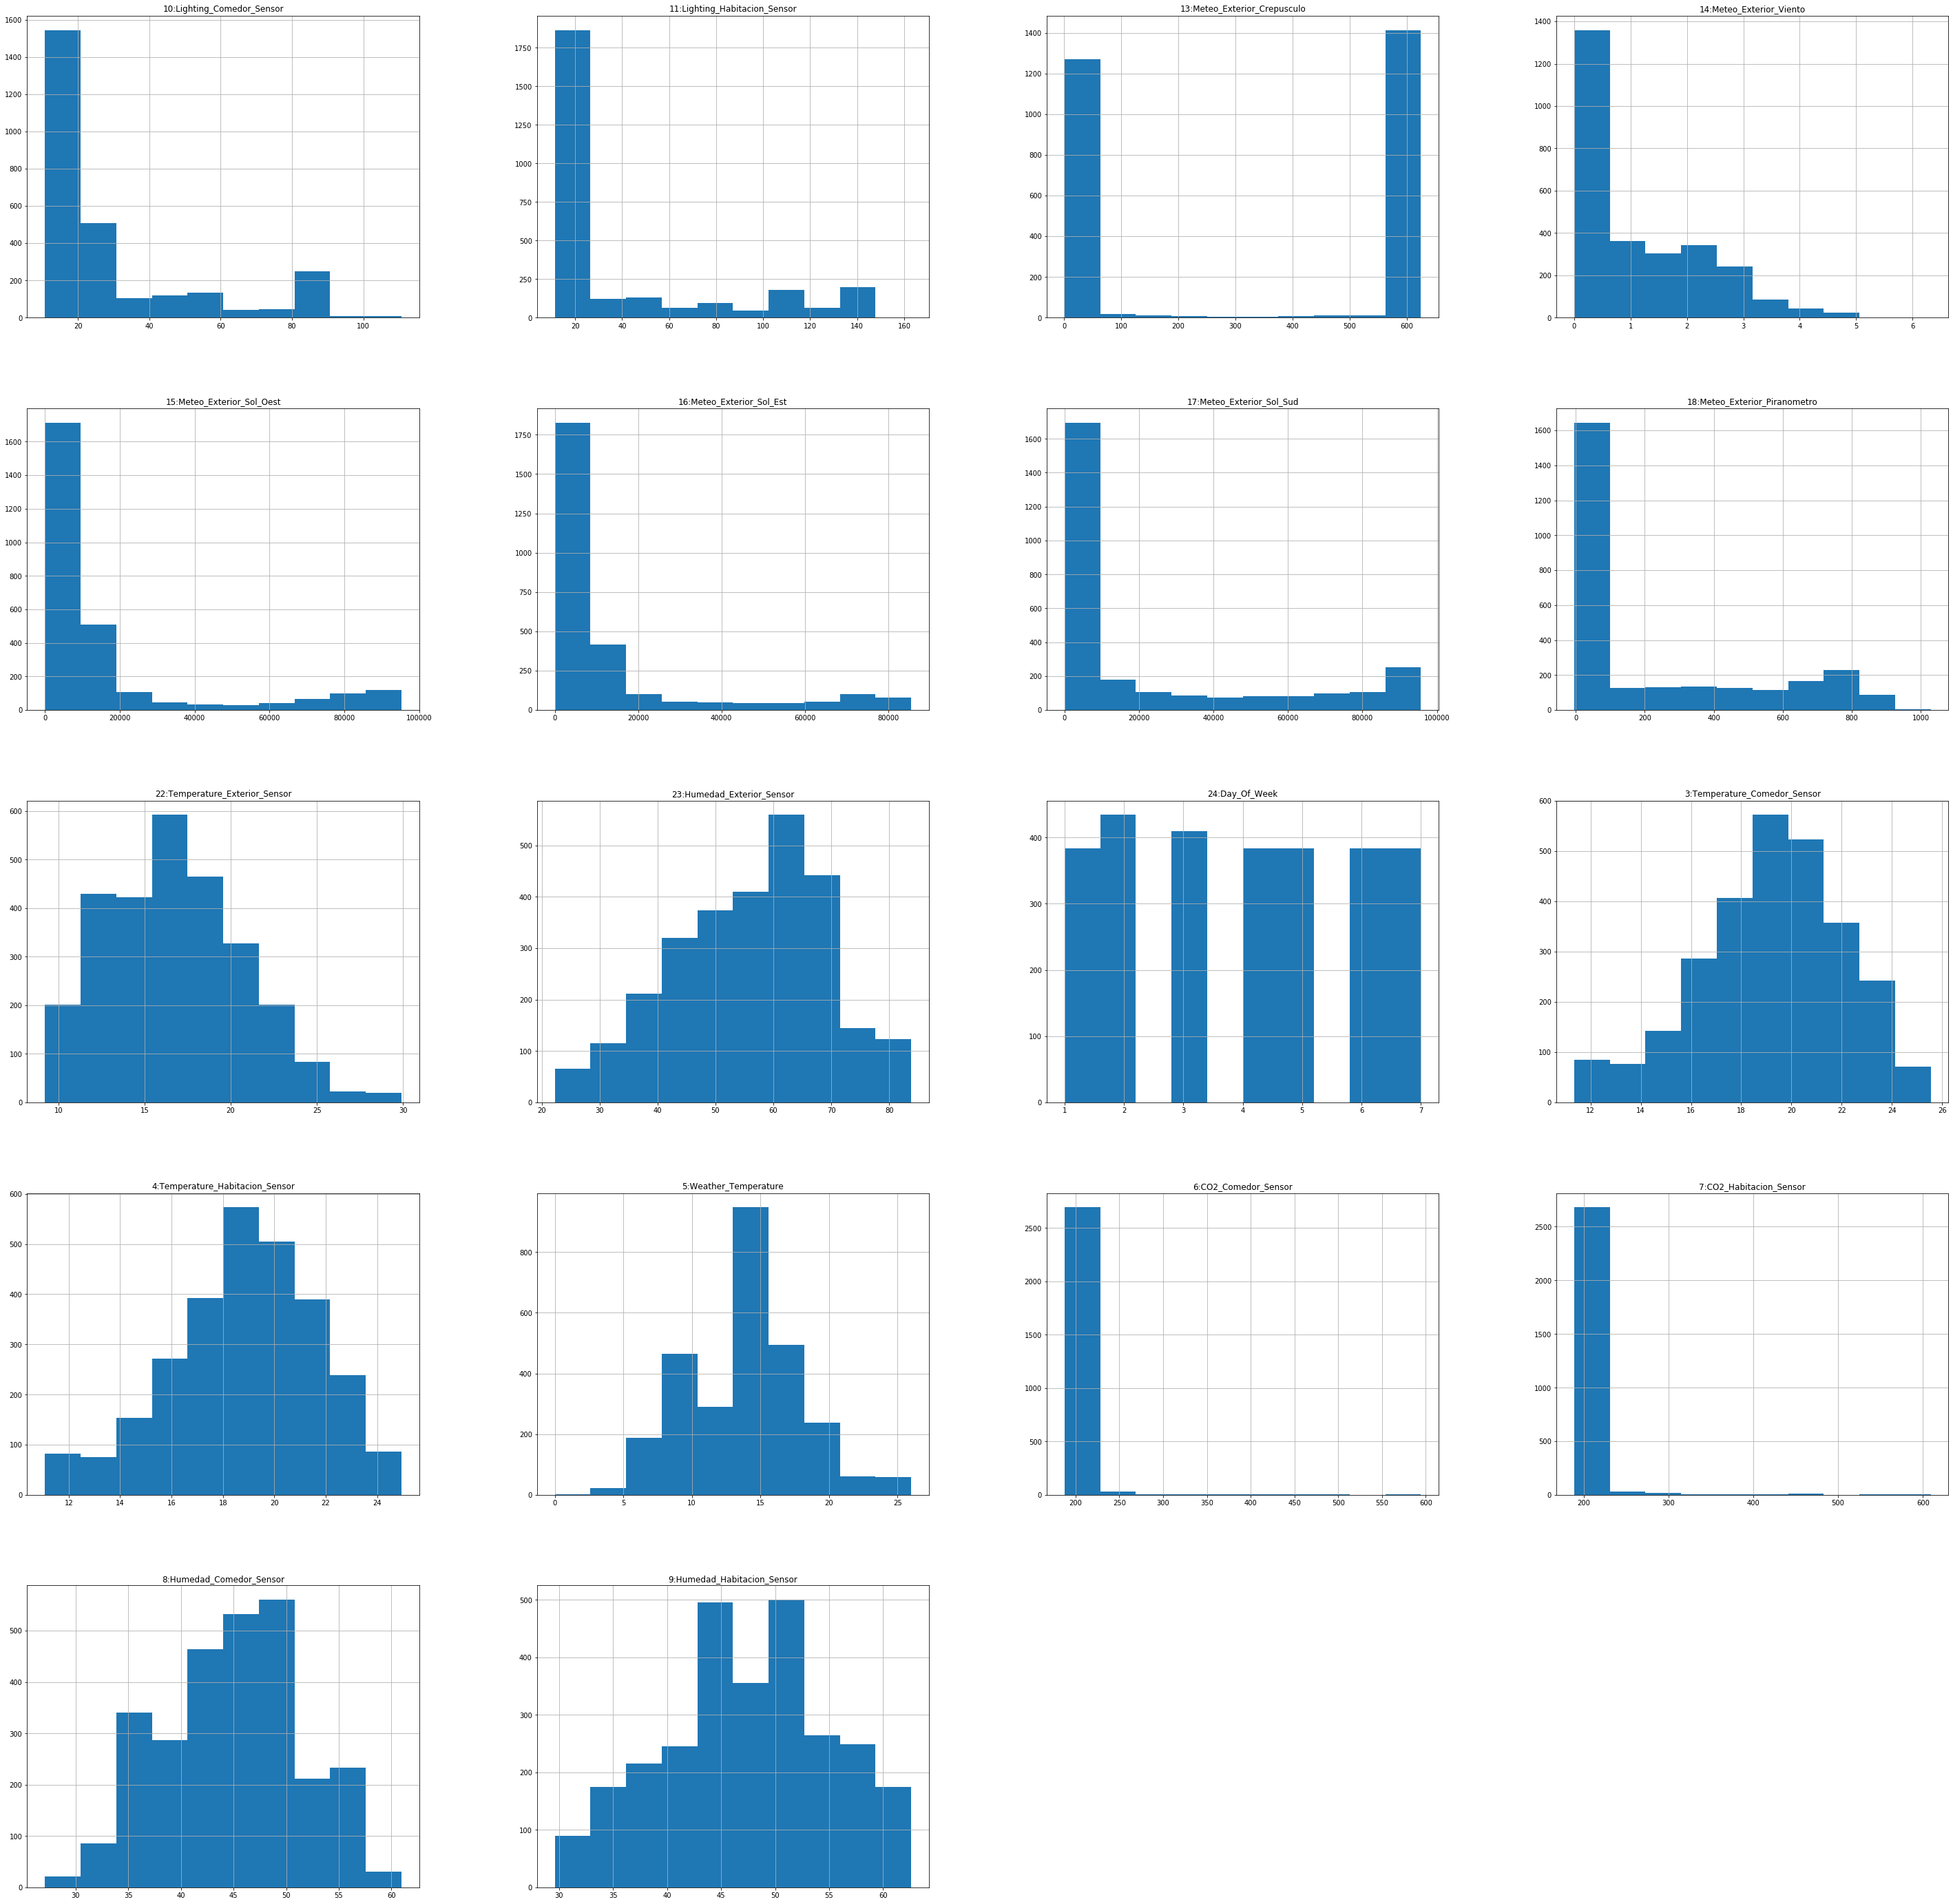

In [16]:
data_sm.hist(figsize=(50,50))

In [17]:
data_sm.columns

Index(['3:Temperature_Comedor_Sensor', '4:Temperature_Habitacion_Sensor',
       '5:Weather_Temperature', '6:CO2_Comedor_Sensor',
       '7:CO2_Habitacion_Sensor', '8:Humedad_Comedor_Sensor',
       '9:Humedad_Habitacion_Sensor', '10:Lighting_Comedor_Sensor',
       '11:Lighting_Habitacion_Sensor', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '22:Temperature_Exterior_Sensor',
       '23:Humedad_Exterior_Sensor', '24:Day_Of_Week'],
      dtype='object')

In [18]:
data_sm=data_sm[["4:Temperature_Habitacion_Sensor",
       "5:Weather_Temperature", "6:CO2_Comedor_Sensor" ,
       "7:CO2_Habitacion_Sensor", "8:Humedad_Comedor_Sensor",
       "9:Humedad_Habitacion_Sensor", "10:Lighting_Comedor_Sensor",
       "11:Lighting_Habitacion_Sensor","13:Meteo_Exterior_Crepusculo",
       "14:Meteo_Exterior_Viento", "15:Meteo_Exterior_Sol_Oest",
       "16:Meteo_Exterior_Sol_Est", "17:Meteo_Exterior_Sol_Sud",
       "18:Meteo_Exterior_Piranometro", "22:Temperature_Exterior_Sensor",
       "23:Humedad_Exterior_Sensor", "24:Day_Of_Week", "3:Temperature_Comedor_Sensor"]]

In [19]:
len(data_sm.columns)

18

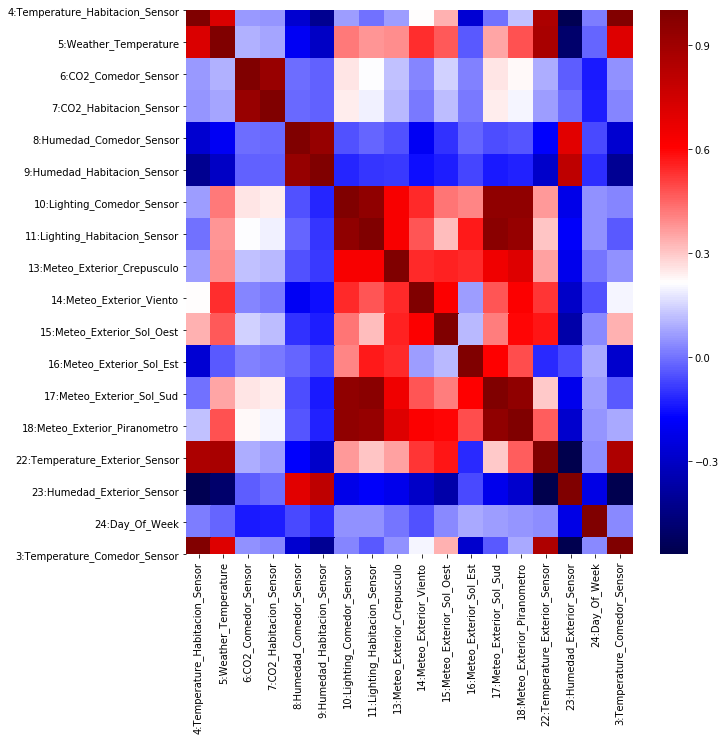

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data_sm.corr(),cmap="seismic")
plt.show();

In [21]:
# Splitting the Data into test and train X being predictor and y being target values
X = data_sm.iloc[:,0:18]
y = data_sm['3:Temperature_Comedor_Sensor']


In [22]:
# Converting Data Frame into Numpy array
X=X.values
y=y.values

In [23]:

type(X)

numpy.ndarray

In [24]:

type(y)

numpy.ndarray

In [25]:
X.shape

(2764, 18)

In [26]:
y.shape

(2764,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
print("Shape of training data is : {}".format(X_train.shape))
print("Shape of testing data is : {}".format(X_test.shape))
print("Shape of training target is : {}".format(y_train.shape))
print("Shape of testing target is : {}".format(y_test.shape))

Shape of training data is : (2211, 18)
Shape of testing data is : (553, 18)
Shape of training target is : (2211,)
Shape of testing target is : (553,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [30]:
from sklearn.feature_selection import RFE

model = linear_model.LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True  True False False False False False False False False False False
 False False False False False  True]
Feature Ranking: [ 1  1  3  2  9  7 11  5 10  8 14 16 15 13  6 12  4  1]


In [31]:
regressor = LinearRegression()  


regressor.fit(X_train, y_train) #training the algorithm
print(regressor.intercept_)

2.2382096176443156e-13


In [32]:
print(regressor.coef_)

[-4.45841356e-16  3.60666916e-16 -5.33658297e-16 -1.07515938e-15
  1.62689864e-15  4.55397692e-16  2.01990231e-17  1.24527066e-16
  1.97275392e-17 -1.03284373e-16 -5.55651039e-19 -1.37356171e-18
  1.17495980e-18 -2.84379125e-17 -4.84205768e-16 -6.94458193e-19
 -1.39566852e-16  1.00000000e+00]


In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([18.83  , 16.9833, 18.7867, 18.5633, 17.054 , 17.7287, 19.6467,
       13.9767, 17.2593, 18.1967, 15.1233, 20.062 , 21.9307, 22.9307,
       21.7227, 19.2353, 22.468 , 23.0693, 18.982 , 15.4493, 20.41  ,
       18.9927, 18.55  , 20.8973, 24.172 , 21.3667, 18.538 , 18.0813,
       20.984 , 18.4827, 24.144 , 22.0373, 14.2107, 23.252 , 25.1347,
       16.0107, 13.7633, 15.2947, 18.7747, 19.81  , 18.9547, 18.4733,
       20.1107, 12.0767, 11.8413, 18.9547, 15.6133, 23.648 , 22.144 ,
       19.416 , 23.4813, 18.616 , 19.4567, 22.5053, 20.996 , 21.792 ,
       13.0267, 18.4893, 16.8433, 18.2967, 15.292 , 21.6093, 16.642 ,
       21.072 , 18.6873, 21.0933, 17.484 , 17.126 , 20.7173, 20.458 ,
       18.498 , 22.032 , 14.65  , 20.856 , 19.698 , 22.0507, 11.902 ,
       15.87  , 12.346 , 22.184 , 18.7053, 18.6527, 16.67  , 20.8973,
       20.56  , 20.7053, 17.1533, 17.476 , 18.4573, 19.6887, 18.3533,
       17.9193, 20.888 , 18.0573, 20.912 , 18.5067, 20.0373, 24.968 ,
       21.4453, 15.8

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 2.897742323368835e-14
